# 유사성 측도

## 거리측정

### 유클리디안 거리

### 유클리디안 제곱거리

### 체비셰프 거리 

 ### 블록, 시티블록, 맨하탄 거리

### 민코브스키 거리 

###  커스텀 거리

## 유사성 측정 

###  코사인 유사도

### 상관계수

# 계층적 군집분석 연결방법

##  최단연결법

두 군집 사이에서 거리가 가장 작은 값을 기준으로 연결

## 최장연결법

두 군집 사이에서 거리가 가장 큰 값을 기준으로 연결

## 중심연결법

군집의 중심값 사이 거리를 기준으로 연결

## 평균연결법

두 군집의 모든 관찰값 간의 거리의 평균을 기준으로 연결

## 와드의 방법

군집의 중심으로부터 관찰치까지의 거리의 제곱합 ESS을 중심으로 ESS가 최소가 되게 연결

# 실습

In [2]:
beer.data <- read.csv("mvadata/beerbrand.csv", header = T)

In [3]:
head(beer.data)

,calories,sodium,alcohol,cost
,<int>,<int>,<dbl>,<dbl>
BUDWEISER,144,15,4.7,0.43
SCHLITZ,151,19,4.9,0.43
LOWENBRAU,157,15,4.9,0.48
KRONENBOURG,170,7,5.2,0.73
HEINEKEN,152,11,5.0,0.77
OLD MILWAUKEE,145,23,4.6,0.28


In [4]:
hc = hclust(dist(beer.data), method = "single")

In [5]:
hc


Call:
hclust(d = dist(beer.data), method = "single")

Cluster method   : single 
Distance         : euclidean 
Number of objects: 20 


hclust 함수로 계층적 군집분석 higherarchical clustering<br>
method 패러미터로 연결방법 선택 가능함 <br>
최단연결법 single, 중심연결 centroid, 최장연결법 complete, 평균연결 average, 와드 ward

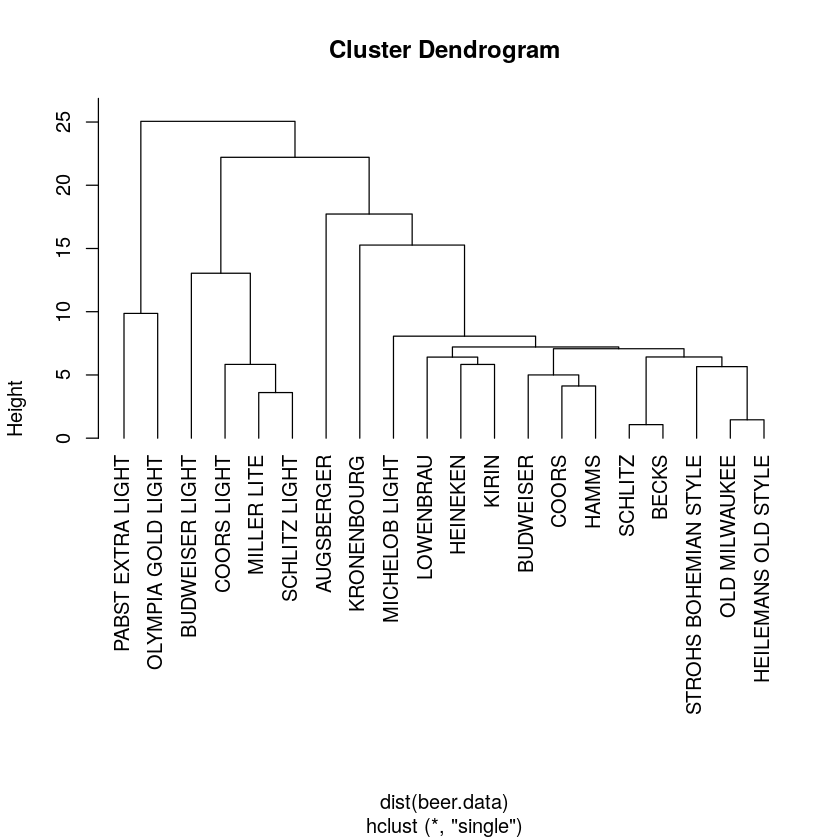

In [6]:
plot(hc, hang = -1)

plot으로 덴드로그램을 그려주는데 hang = -1 옵션으로 잘 정렬되어 보기 좋게 나타난다.

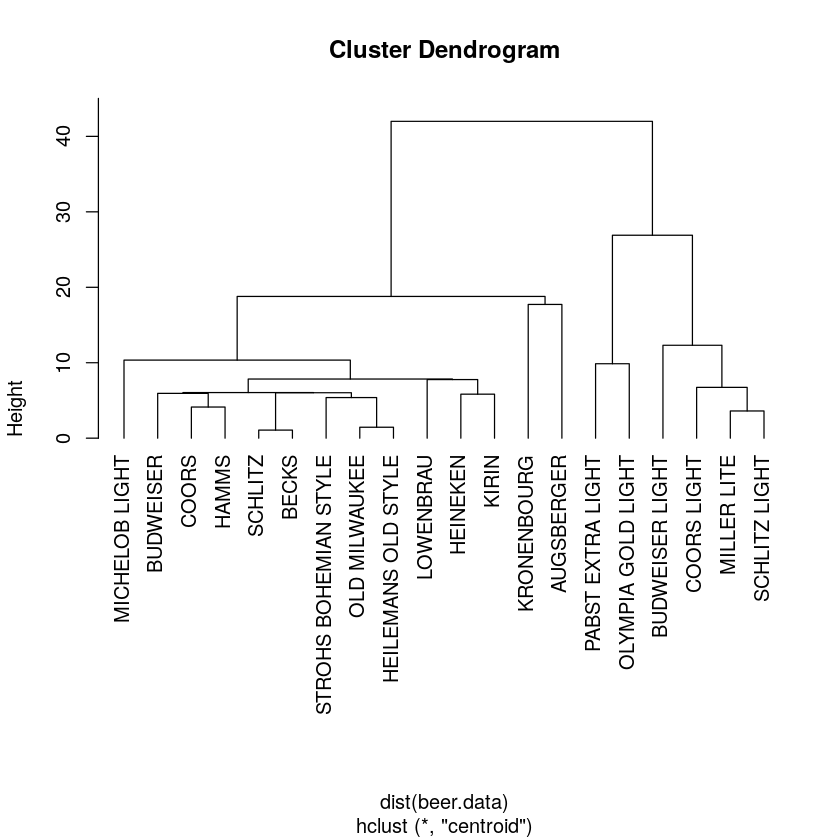

In [7]:
hcc = hclust(dist(beer.data), method = "centroid")
plot(hcc, hang = -1)

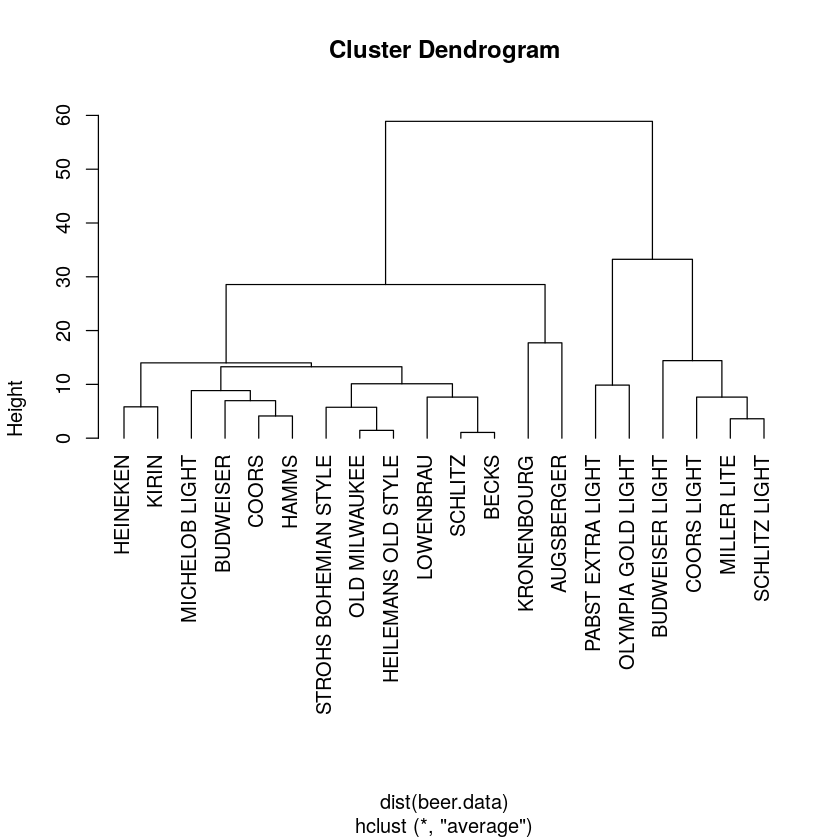

In [8]:
hca = hclust(dist(beer.data), method = "average")
plot(hca, hang = -1)

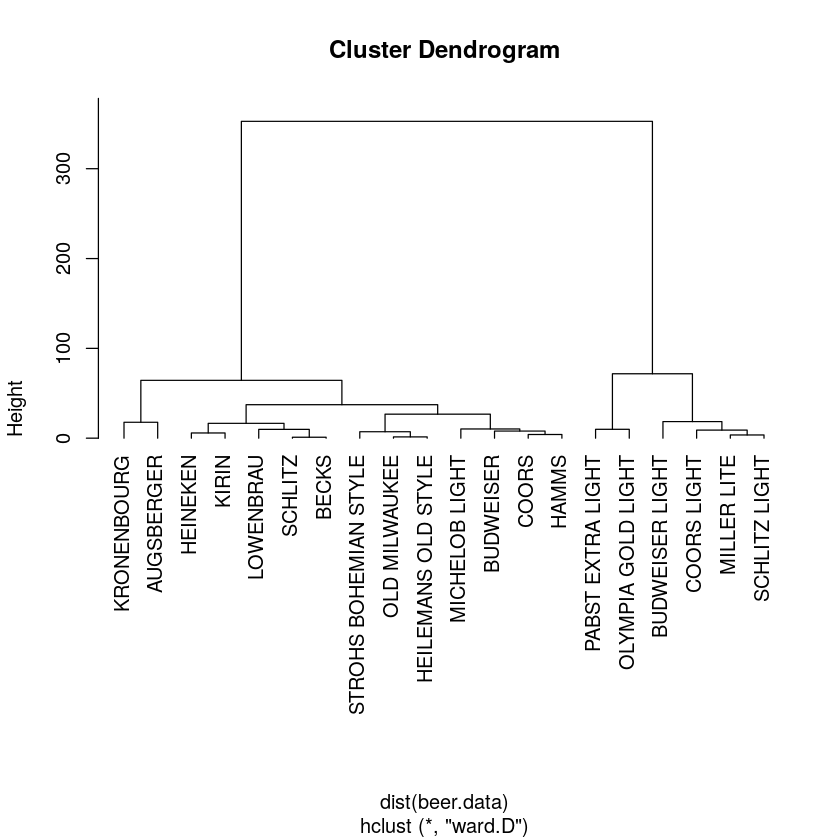

In [10]:
hcw = hclust(dist(beer.data), method = "ward.D")
plot(hcw, hang = -1)

In [12]:
library(pls)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




표준화함수 stdize를 포함하는 pls 라이브러리 불러옴

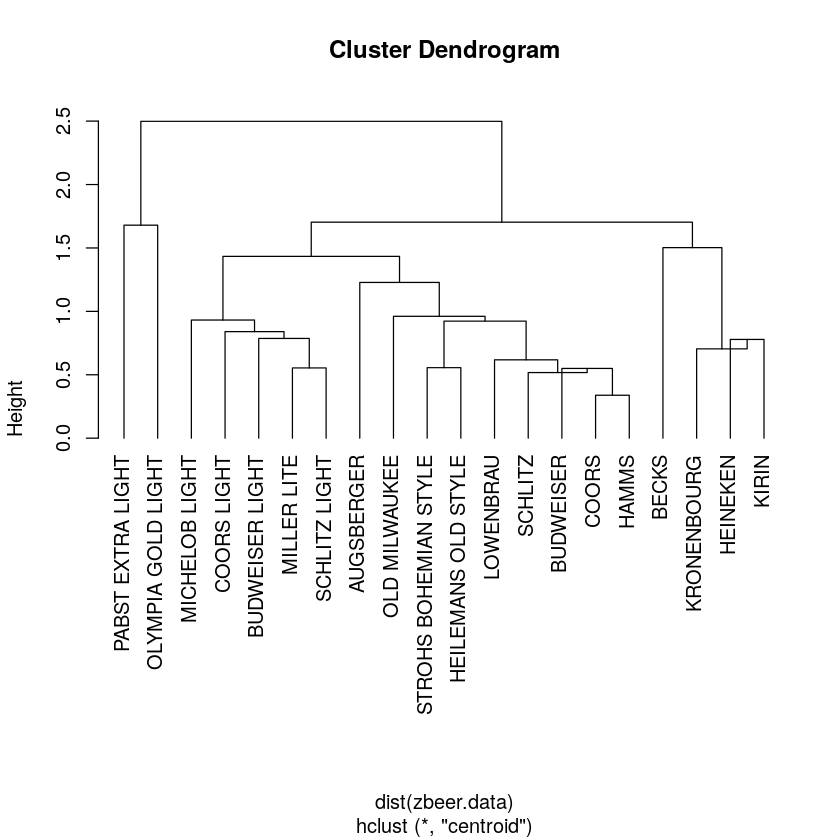

In [14]:
zbeer.data = stdize(as.matrix(beer.data))
zhc = hclust(dist(zbeer.data), method = "centroid")
plot(zhc, hang = -1)

In [16]:
zhc.cent24 = cutree(zhc, 2:4)
zhc.cent24

,2,3,4
BUDWEISER,1,1,1
SCHLITZ,1,1,1
LOWENBRAU,1,1,1
KRONENBOURG,1,2,2
HEINEKEN,1,2,2
OLD MILWAUKEE,1,1,1
AUGSBERGER,1,1,1
STROHS BOHEMIAN STYLE,1,1,1
MILLER LITE,1,1,1
BUDWEISER LIGHT,1,1,1


군집이 2~4개일 때 어느 군집에 속하는지 보여줌

In [19]:
table(zhc.cent24[, 2])


 1  2  3 
14  4  2 

몇 번째 군집에 몇개가 속하는지 보여줌